In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import datetime
import matplotlib.pyplot as plt


In [2]:
data=pd.read_table('C:/Users/saragada/Desktop/HPI/Forecast/bw/bw.data', sep='\034',encoding='latin-1',error_bad_lines=False)

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (0,2,10,26,39,40,41,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
from datetime import datetime
from dateutil import relativedelta

months=list()
#This will find the difference between the two dates
for i in range(0,len(data)):
    difference = relativedelta.relativedelta(datetime.strptime(data['VAL_DT'][i],'%Y-%m-%d'),datetime.strptime(data['POST_DT'][i],'%Y-%m-%d'))
    months.append(difference.months)



KeyboardInterrupt: 

In [ ]:
data['Category']=months

In [ ]:
a=data['Category'].unique()

In [ ]:
a

In [ ]:
for i in a:
    datak=data[data['Category']==i]
    datak.to_csv('C:/Users/saragada/Desktop/HPI/Fresh Start Forecast/Data/dataslice'+str(i)+'.csv')

In [51]:
import pandas as pd
import numpy as np
from HPprophecy import Prophecy

In [52]:
dataF=pd.read_csv('C:/Users/saragada/Desktop/HPI/Fresh Start Forecast/Data/dataslice1.csv',encoding='latin-1')

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,11,27,40,41,42,48,52,53,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
df=dataF.groupby('VAL_DT', as_index=False).agg({"USD_AMT": "sum"})
df=df.reset_index()

In [54]:
df=df[['VAL_DT','USD_AMT']]

In [55]:
df.rename(columns={'VAL_DT': 'ds', 'USD_AMT': 'y'}, inplace=True)

INFO:HPprophecy.forecaster:Disabling yearly seasonality. Run prophecy with yearly_seasonality=True to override this.
INFO:HPprophecy.forecaster:Disabling daily seasonality. Run prophecy with daily_seasonality=True to override this.
C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


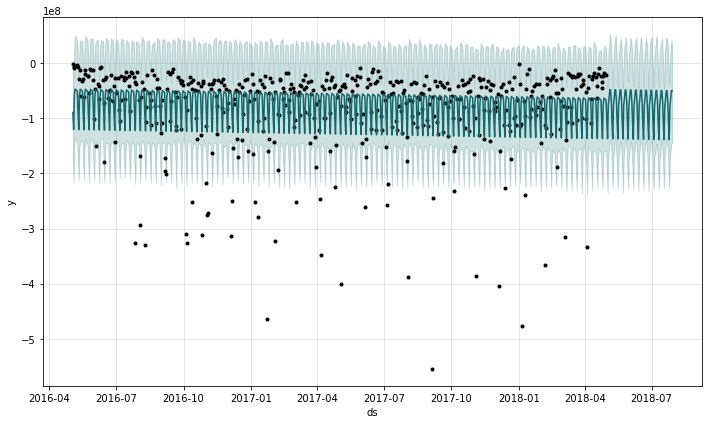

In [56]:
m = Prophecy(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=90, freq='D')
fcst = m.predict(future)
m.plot(fcst)



In [38]:
df=df.reset_index()

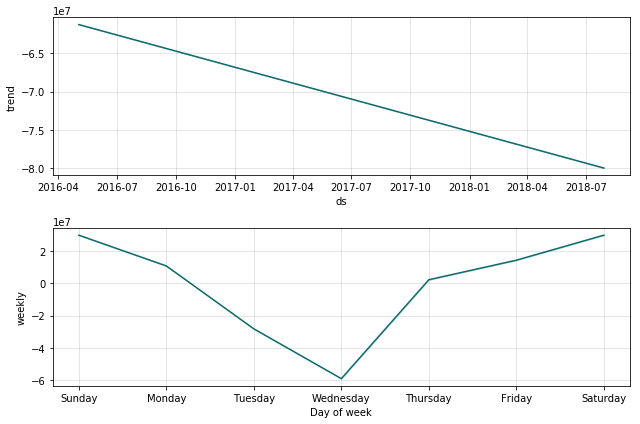

In [57]:
m.plot_components(fcst)

In [10]:
accuracy=fcst['yhat'][:len(data)].sum()/(data['y']).sum()

In [11]:
accuracy

0.9937602807376135

In [47]:
fcst.reset_index()
df.reset_index()

ds             y
0    2016-05-03 -1.374042e+06
1    2016-05-04 -9.169082e+06
2    2016-05-05 -6.473900e+06
3    2016-05-06 -4.567953e+06
4    2016-05-09 -3.507366e+06
5    2016-05-10 -7.786822e+06
6    2016-05-11 -2.895818e+07
7    2016-05-12 -1.205837e+07
8    2016-05-13 -5.877759e+07
9    2016-05-16 -3.264113e+07
10   2016-05-17 -2.856599e+07
11   2016-05-18 -6.187517e+07
12   2016-05-19 -1.954535e+07
13   2016-05-20 -1.166090e+07
14   2016-05-23 -2.390424e+07
15   2016-05-24 -2.363935e+07
16   2016-05-25 -5.413616e+07
17   2016-05-26 -1.006465e+07
18   2016-05-27 -1.257008e+07
19   2016-05-30 -1.255517e+07
20   2016-05-31 -3.006415e+07
21   2016-06-01 -1.004404e+08
22   2016-06-02 -4.646942e+07
23   2016-06-03 -1.501907e+08
24   2016-06-06 -3.822188e+07
25   2016-06-07 -4.168193e+07
26   2016-06-08 -6.547480e+07
27   2016-06-09 -8.978629e+06
28   2016-06-10 -7.790576e+06
29   2016-06-13 -3.131864e+07
..          ...           ...
490  2018-03-20 -4.763973e+07
491  2018-03-21 -1.039143e+08
492  2018-03-22 -2.360452e+07
493  2018-03-23 -1.952696e+07
494  2018-03-26 -2.033718e+07
495  2018-03-27 -4.191501e+07
496  2018-03-28 -9.869043e+07
497  2018-03-29 -3.037926e+07
498  2018-03-30 -3.817594e+07
499  2018-04-02 -5.157144e+07
500  2018-04-03 -1.020858e+08
501  2018-04-04 -3.334755e+08
502  2018-04-05 -4.459295e+07
503  2018-04-06 -2.295187e+07
504  2018-04-09 -1.080730e+08
505  2018-04-10 -6.409688e+07
506  2018-04-11 -2.898432e+07
507  2018-04-12 -2.289392e+07
508  2018-04-13 -1.858483e+07
509  2018-04-16 -2.431126e+07
510  2018-04-17 -6.340410e+07
511  2018-04-18 -4.190330e+07
512  2018-04-19 -1.985034e+07
513  2018-04-20 -9.140509e+06
514  2018-04-23 -2.275323e+07
515  2018-04-24 -4.541930e+07
516  2018-04-25 -3.409376e+07
517  2018-04-26 -2.372913e+07
518  2018-04-27 -1.758258e+07
519  2018-04-30 -2.143954e+07

[520 rows x 2 columns]

In [22]:
p=pd.DataFrame()

In [ ]:
p['fcst']=k

In [ ]:
p.to_csv('data1.csv')

In [ ]:
type(fcst)

In [ ]:
type(data['y'])

In [23]:
k=pd.DataFrame(data['y'])

In [24]:
p['y']=k

In [29]:
p['fcst']=pd.DataFrame(fcst['yhat'])

In [30]:
p['date']=pd.DataFrame(fcst['ds'])

In [31]:
p.to_csv('predict.csv')

In [32]:
import matplotlib.pyplot as plt
 
%matplotlib inline #only needed for jupyter
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

UsageError: unrecognized arguments: #only needed for jupyter


In [58]:
df.set_index('ds', inplace=True)
fcst.set_index('ds', inplace=True)

In [59]:

viz_df = df.join(fcst[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
del viz_df['y']


KeyError: 'index'

In [63]:
df.index = pd.to_datetime(df.index)
last_date = df.index[-1]

In [69]:
def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
   
# Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(df.y)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
    
  
# change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot


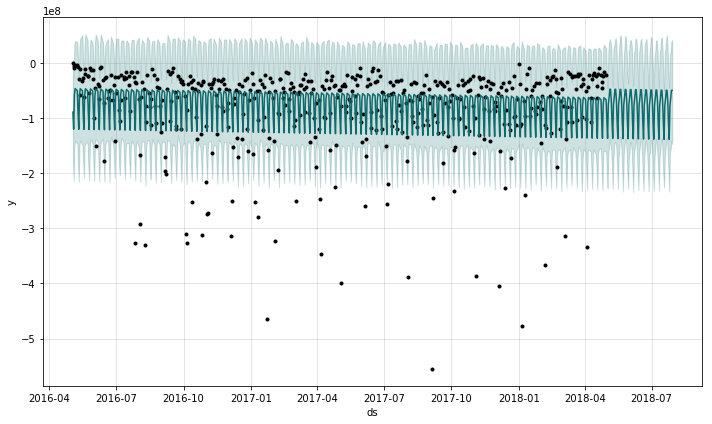

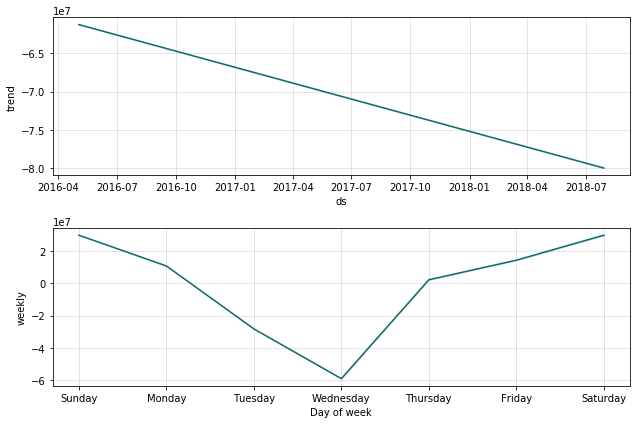

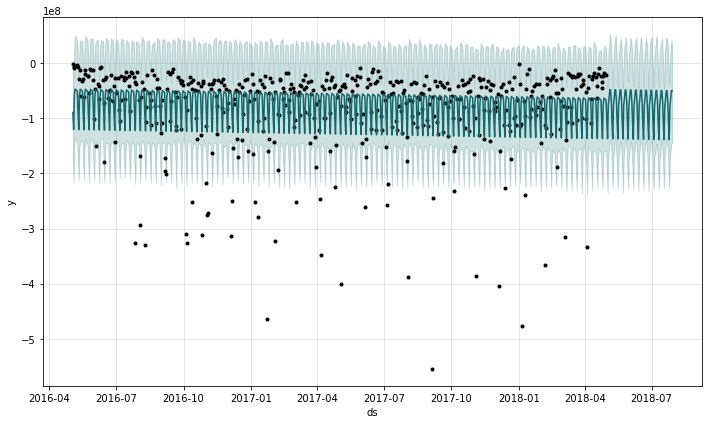

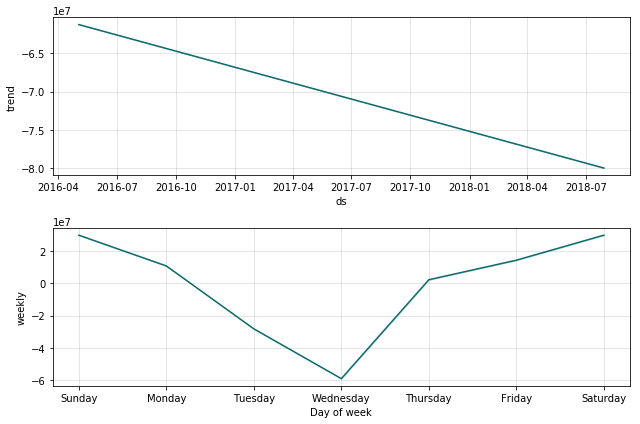

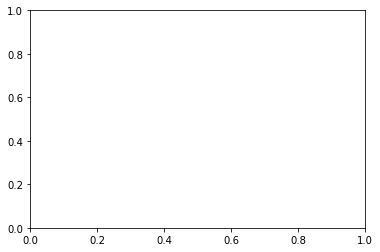

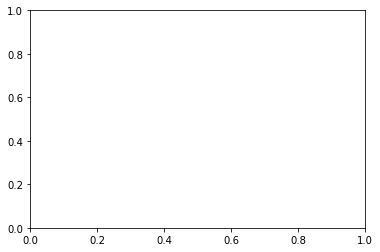

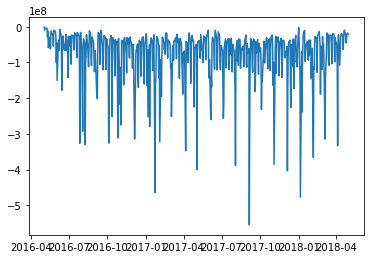

In [70]:
plt.show()